In [14]:
import sys
sys.path.append('../../')

from dataset import XRayDataset
import utils
from transformers import AutoImageProcessor
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from glob import glob
import cv2

In [ ]:
idx = 0
model_name = 'openmmlab/upernet-convnext-small'
crop_types = ['crop_finger', 'crop_backhand', 'crop_fingerbackhand', 'crop_arm']
crop_info_path = '/data/ephemeral/home/Dongjin/level2-cv-semanticsegmentation-cv-02-lv3/Baseline/Dongjin/transformers_1124/notebook/crop/result/crop_info.json'
crop_info = utils.read_json(crop_info_path)
image_processor = AutoImageProcessor.from_pretrained(model_name)

data_dir_path = '/data/ephemeral/home/data'
data_info_path = '/data/ephemeral/home/Dongjin/level2-cv-semanticsegmentation-cv-02-lv3/Data/train_valid_split/splits/fold_0.json'


In [16]:
def normalize(arr):
    min, max = arr.min(), arr.max()
    amp = max - min
    arr = (arr - min) / amp
    return arr

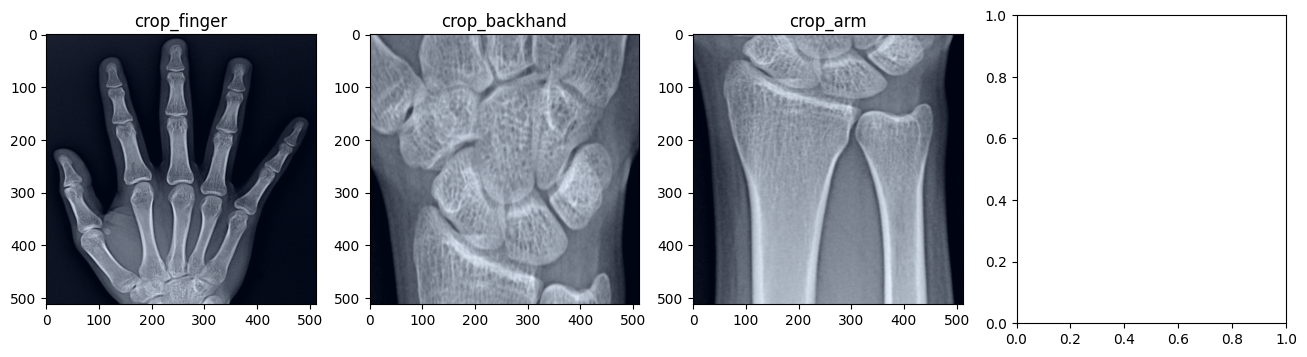

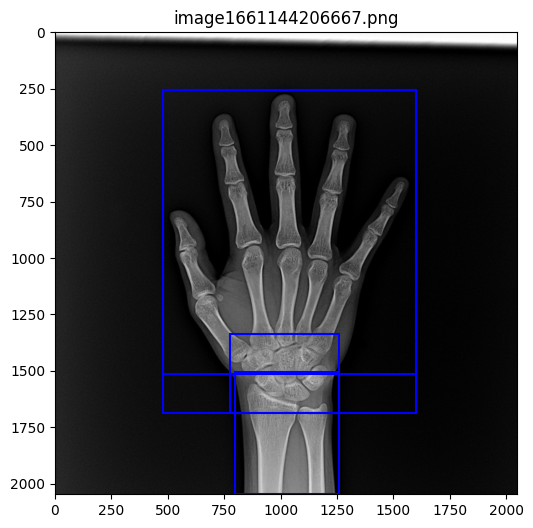

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, crop_type in enumerate(crop_types):
    train_dataset = XRayDataset(mode='train',
                    crop_type=crop_type,
                    crop_info=crop_info,
                    transforms=None,
                    image_processor=image_processor,
                    data_dir_path=data_dir_path,
                    data_info_path=data_info_path,
                    debug=False)
    
    result, image_name = train_dataset[idx]
    pixel_values = normalize(train_dataset[0][idx]['pixel_values'].permute(1, 2, 0))
    axes[i].set_title(crop_type)
    axes[i].imshow(pixel_values)

fig.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
image_paths = glob(data_dir_path + f'/**/{image_name}', recursive=True)
image = cv2.imread(image_paths[0])

ax.set_title(image_name)
ax.imshow(image)

for k, v in crop_info[image_name].items():
    x1, x2, y1, y2 = v
    w, h = x2-x1, y2-y1

    # rect = patches.Rectangle((x1, y1), w, h, linewidth=2, facecolor='none')
    rect = patches.Rectangle((x1, y1), w, h, linewidth=1.5, edgecolor='b', facecolor='none')
    ax.add_patch(rect)

fig.show()

In [18]:
image.shape

(2048, 2048, 3)